In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
spam_df = pd.read_csv('spam.csv')

In [3]:
spam_df.head()

,spam,make,address,all,3d,our,over,remove,internet,order,...,conference,ch;,ch(,ch[,ch!,ch$,ch#,crl.ave,crl.long,crl.tot
0,True,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,True,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,True,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,True,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,True,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [7]:
reg_tree_mod = DecisionTreeRegressor().fit(spam_df.drop('spam',1), spam_df['spam'])
feat_imps = reg_tree_mod.feature_importances_

In [8]:
feat_imp_df = pd.DataFrame({'variable_name': spam_df.drop('spam',1).columns , 'importance': feat_imps}) \
                .sort_values('importance', ascending=False)
feat_imp_df.head(10)

,variable_name,importance
52,ch$,0.330297
6,remove,0.151896
51,ch!,0.100028
24,hp,0.045919
56,crl.tot,0.043392
15,free,0.035608
55,crl.long,0.028768
45,edu,0.022737
18,you,0.021816
54,crl.ave,0.020901


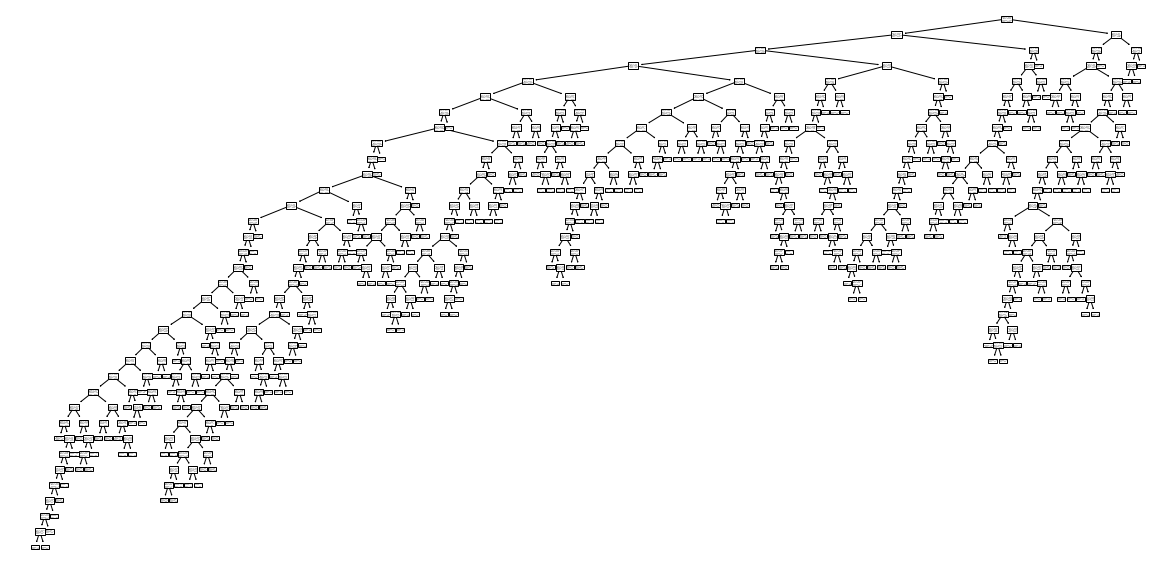

In [9]:
plt.figure(figsize=(20, 10))
tree.plot_tree(reg_tree_mod)
plt.show()

In [15]:
reg_tree_mod = DecisionTreeClassifier(max_depth=4).fit(spam_df.drop('spam',1), spam_df['spam'])
feat_imps = reg_tree_mod.feature_importances_

In [16]:
feat_imp_df = pd.DataFrame({'variable_name': spam_df.drop('spam',1).columns , 'importance': feat_imps}) \
                .sort_values('importance', ascending=False)
feat_imp_df.head(10)

,variable_name,importance
52,ch$,0.475020
6,remove,0.220375
51,ch!,0.115238
24,hp,0.060752
56,crl.tot,0.042566
15,free,0.030844
45,edu,0.020713
26,george,0.014878
55,crl.long,0.011233
17,email,0.007071


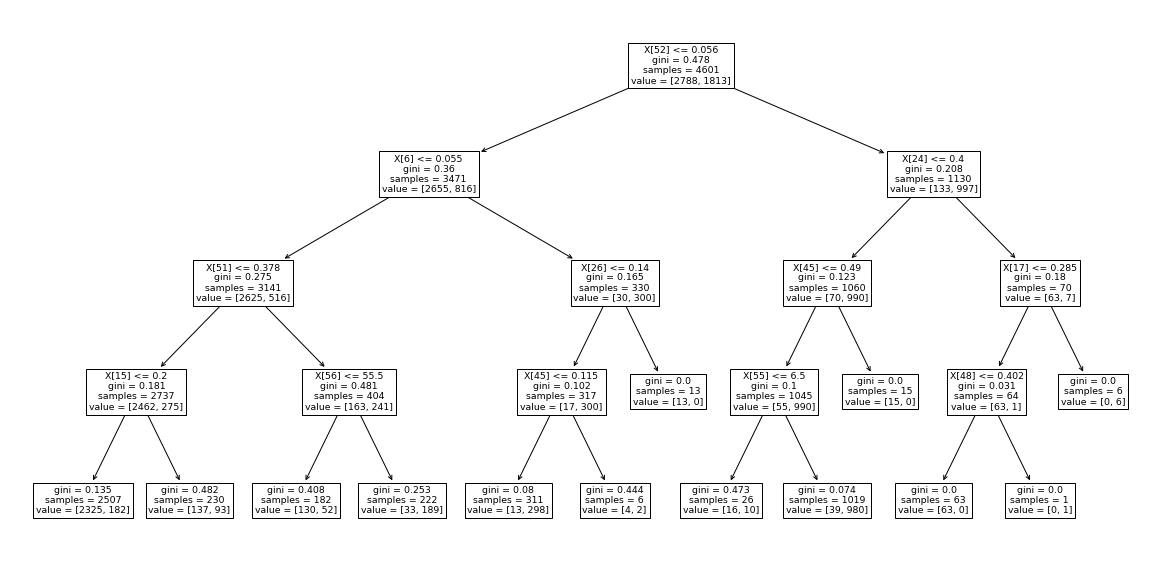

In [17]:
plt.figure(figsize=(20, 10))
tree.plot_tree(reg_tree_mod)
plt.show()

In [18]:
obs_vs_pred = pd.DataFrame({'observed': spam_df['spam'],
                            'predicted': np.round(reg_tree_mod.predict(spam_df.drop('spam',1)))})
obs_vs_pred['weight'] = 1
conf_matrix = obs_vs_pred.groupby(['observed', 'predicted']) \
           .count().reset_index().sort_values(['observed', 'predicted'], ascending=False)
conf_matrix['perc_total'] = np.round(conf_matrix['weight'] / conf_matrix['weight'].sum(),2) * 100
conf_matrix

,observed,predicted,weight,perc_total
3,True,1.0,1474,32.0
2,True,0.0,339,7.0
1,False,1.0,85,2.0
0,False,0.0,2703,59.0
